In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords import load, align_data_element, SynthCell, CellPlot
import tifffile

In this notebook we will use the coordinate system in the cells to align all fluorescence images.

In [3]:
cy3b = load('Cy3B_NHS/cells_final.hdf5')
egfp = load('eGFP/cells_final.hdf5')
len(cy3b), len(egfp)

(2341, 1691)

First we compare the radii of all cells in both datasets:

<IPython.core.display.Javascript object>


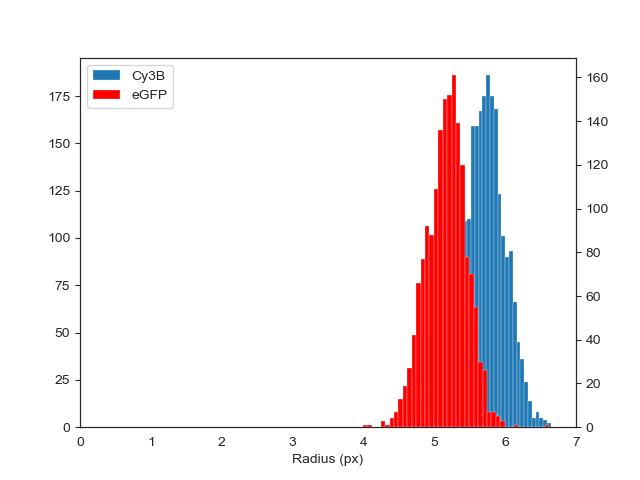

In [5]:
fig, ax1 = plt.subplots()
h = ax1.hist(cy3b.radius, bins='fd', linewidth=0.2, label='Cy3B')
ax2 = ax1.twinx()
h = ax2.hist(egfp.radius, bins='fd', color='r', linewidth=0.2, label='eGFP')
plt.xlim(0, 7)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_xlabel('Radius (px)')
plt.legend(handles=h1 + h2, loc='upper left')

As can be seen, there is a slight difference in the cell's radii between both datasets. By aligning the cells wrt a model cell, any differences in radius, length and curvature are eliminated. A synthetic 'model' cell is generated:

In [58]:
sc = SynthCell(40, 7.6, 1e-10, pad_width=10)

<IPython.core.display.Javascript object>


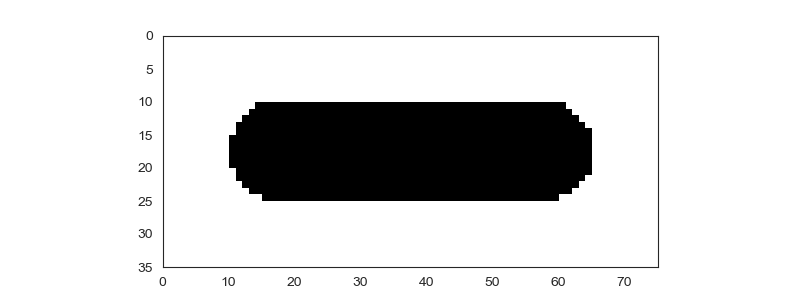

In [59]:
cp = CellPlot(sc)
plt.figure(figsize=(8,3))
ax = cp.imshow('binary')

Then to align fluorescence images from each dataset:

In [61]:
cy3b_aligned = align_data_element(sc, cy3b, 'fluorescence')

In [63]:
egfp_aligned = align_data_element(sc, egfp, 'fluorescence')

<IPython.core.display.Javascript object>


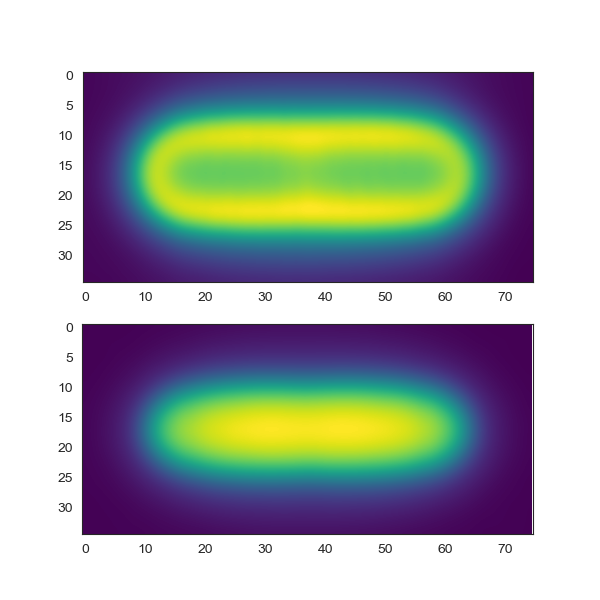

In [68]:
fig, axes = plt.subplots(2, 1, figsize=(6,6))
axes[0].imshow(cy3b_aligned, cmap='viridis', interpolation='spline16')
axes[1].imshow(egfp_aligned, cmap='viridis', interpolation='spline16')

In [71]:
tifffile.imsave('Cy3B_aligned.tif', cy3b_aligned)
tifffile.imsave('eGFP_aligned.tif', egfp_aligned)